# imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import matplotlib.pyplot as plt
from GaussPRuning import GPRuning

# Data Load

In [3]:
from astropy.table import Table
dat=Table.read('galaxys_sfrs.fits',format='fits')
rates=dat.to_pandas()
display(rates)

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.121862e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,3.256150e+07,3.226286e+07,1.037673e+07,4.229310e+07,1.072917e+07,2.173636e+07,2.177563e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.178302e+07,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,7.295124e+08,4.404904e+08,3.356027e+08,2.405086e+08,2.738574e+08,3.140056e+08,1.922456e+08,1.120082e+08,1.200427e+08,1.400753e+08,...,5.248176e+07,6.641031e+07,3.001523e+07,3.100902e+07,1.473460e+07,0.000000e+00,3.398283e+07,2.194465e+07,0.000000e+00,3.003129e+07
133,6.940287e+08,4.650906e+08,4.057089e+08,2.077538e+08,3.093920e+08,2.596892e+08,1.309353e+08,9.245748e+07,6.808451e+07,2.296683e+08,...,3.655407e+07,0.000000e+00,4.710746e+07,1.758170e+07,7.644297e+07,1.725578e+07,0.000000e+00,3.030378e+07,1.945364e+07,3.059502e+07
134,4.698348e+08,5.089063e+08,3.036264e+08,2.136808e+08,1.860453e+08,3.645791e+08,1.893089e+08,1.009134e+08,1.075266e+08,1.604431e+08,...,8.162382e+07,1.850274e+07,0.000000e+00,3.267689e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.602040e+07,0.000000e+00
135,8.627910e+08,4.945482e+08,3.818802e+08,2.566368e+08,1.701542e+08,2.883755e+08,2.589155e+08,1.805147e+08,1.884018e+08,2.499633e+08,...,6.201738e+07,1.537943e+07,2.022051e+07,3.324831e+07,0.000000e+00,3.270665e+07,2.003634e+07,0.000000e+00,3.401413e+07,0.000000e+00


#  Data reform to ML stardards

In [4]:
rates=rates.T

In [5]:
rates.columns=['{0}'.format(np.round(i,2)) for i in np.arange(0,13.7,0.1)]
#rates.columns=['t{0}'.format(i) for i in range(133)]

In [6]:
display(rates)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,12.7,12.8,12.9,13.0,13.1,13.2,13.3,13.4,13.5,13.6
0,0.0,0.0,0.0,1.121862e+07,3.256150e+07,1.961643e+08,4.282718e+08,6.812987e+08,1.047628e+09,1.301042e+09,...,6.508281e+08,8.364835e+08,5.797614e+08,6.618303e+08,7.391168e+08,7.295124e+08,6.940287e+08,4.698348e+08,8.627910e+08,7.591623e+08
1,0.0,0.0,0.0,0.000000e+00,3.226286e+07,8.688608e+07,4.121117e+08,7.326325e+08,8.942239e+08,9.280033e+08,...,6.126047e+08,7.134899e+08,5.734740e+08,5.411283e+08,5.685780e+08,4.404904e+08,4.650906e+08,5.089063e+08,4.945482e+08,8.317077e+08
2,0.0,0.0,0.0,0.000000e+00,1.037673e+07,7.635112e+07,1.863183e+08,2.361260e+08,5.173480e+08,4.741350e+08,...,4.010380e+08,2.646682e+08,3.444549e+08,3.144290e+08,1.960162e+08,3.356027e+08,4.057089e+08,3.036264e+08,3.818802e+08,3.496724e+08
3,0.0,0.0,0.0,0.000000e+00,4.229310e+07,6.577377e+07,1.526784e+08,2.366565e+08,3.025478e+08,3.329345e+08,...,2.066797e+08,1.469355e+08,1.265869e+08,2.548682e+08,1.719007e+08,2.405086e+08,2.077538e+08,2.136808e+08,2.566368e+08,2.748107e+08
4,0.0,0.0,0.0,0.000000e+00,1.072917e+07,6.519520e+07,8.725689e+07,2.357612e+08,1.852791e+08,3.250672e+08,...,1.761281e+08,3.127461e+08,1.250349e+08,2.280316e+08,2.663921e+08,2.738574e+08,3.093920e+08,1.860453e+08,1.701542e+08,3.358560e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.103925e+07,2.170654e+07,7.616055e+07,1.054068e+08,3.216536e+07,...,3.348012e+07,1.671692e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.725578e+07,0.000000e+00,3.270665e+07,0.000000e+00
416,0.0,0.0,0.0,0.000000e+00,2.178302e+07,0.000000e+00,3.451718e+07,4.430755e+07,5.351280e+07,2.157221e+07,...,0.000000e+00,1.491179e+07,2.885416e+07,3.481994e+07,0.000000e+00,3.398283e+07,0.000000e+00,0.000000e+00,2.003634e+07,1.777705e+07
417,0.0,0.0,0.0,0.000000e+00,0.000000e+00,1.059338e+07,1.071525e+07,7.522810e+07,2.188645e+07,1.070348e+08,...,1.473930e+07,5.027831e+07,3.431547e+07,0.000000e+00,4.895041e+07,2.194465e+07,3.030378e+07,0.000000e+00,0.000000e+00,2.708258e+07
418,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2.144660e+07,0.000000e+00,2.233447e+07,1.053516e+07,3.301626e+07,...,2.999364e+07,0.000000e+00,0.000000e+00,4.570584e+07,3.166487e+07,0.000000e+00,1.945364e+07,4.602040e+07,3.401413e+07,4.060436e+07


# defining parameters

In [7]:
X=np.arange(0,len(rates.columns)/10,0.1).reshape(-1,1)

kernel0=RBF(6,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel1=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))+RBF(0.01,(1e-2,1e2))*C(0.01,(1e-2,1e2))
kernel2=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel3=RBF(6,(1e-2,1e2))+RBF(0.6,(1e-2,1e2))*C(0.1,(1e-2,1e2))
kernel4=RBF(10,(1e-2,1e2))+RBF(0.1,(1e-2,1e2))*C(0.01,(1e-2,1e2))

kernels=(kernel1,kernel2)
alphas=(0.1,1,10)

parameters={'kernel':kernels}

# Galactic Tuning, Gaussian Pruning

In [8]:
#create class object
gt=GPRuning(X=X,galaxies=rates)

In [9]:
#create model
gpr=GaussianProcessRegressor(n_restarts_optimizer=9)

# parameter evaluation - parameval

In [10]:
#grid search with cross validation (splits)
#produces mean and std test score in a results dicionary for each parameter set
results=gt.parameval(model=gpr,parameters=parameters,splits=3, random_state=1)

0. Grid searching for Galaxy 0


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1. Grid searching for Galaxy 1
2. Grid searching for Galaxy 2
3. Grid searching for Galaxy 3
4. Grid searching for Galaxy 4
5. Grid searching for Galaxy 5
6. Grid searching for Galaxy 6


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


7. Grid searching for Galaxy 7


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


8. Grid searching for Galaxy 8
9. Grid searching for Galaxy 9
10. Grid searching for Galaxy 10
11. Grid searching for Galaxy 11
12. Grid searching for Galaxy 12
13. Grid searching for Galaxy 13


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


14. Grid searching for Galaxy 14


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


15. Grid searching for Galaxy 15


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


16. Grid searching for Galaxy 16
17. Grid searching for Galaxy 17


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


18. Grid searching for Galaxy 18
19. Grid searching for Galaxy 19


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


20. Grid searching for Galaxy 20
21. Grid searching for Galaxy 21
22. Grid searching for Galaxy 22
23. Grid searching for Galaxy 23
24. Grid searching for Galaxy 24
25. Grid searching for Galaxy 25


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


26. Grid searching for Galaxy 26


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


27. Grid searching for Galaxy 27


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


28. Grid searching for Galaxy 28


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


29. Grid searching for Galaxy 29
30. Grid searching for Galaxy 30
31. Grid searching for Galaxy 31
32. Grid searching for Galaxy 32
33. Grid searching for Galaxy 33
34. Grid searching for Galaxy 34


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


35. Grid searching for Galaxy 35


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


36. Grid searching for Galaxy 36
37. Grid searching for Galaxy 37


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


38. Grid searching for Galaxy 38
39. Grid searching for Galaxy 39
40. Grid searching for Galaxy 40


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


41. Grid searching for Galaxy 41
42. Grid searching for Galaxy 42


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


43. Grid searching for Galaxy 43
44. Grid searching for Galaxy 44


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


45. Grid searching for Galaxy 45


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


46. Grid searching for Galaxy 46
47. Grid searching for Galaxy 47
48. Grid searching for Galaxy 48
49. Grid searching for Galaxy 49
50. Grid searching for Galaxy 50
51. Grid searching for Galaxy 51
52. Grid searching for Galaxy 52


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


53. Grid searching for Galaxy 53


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


54. Grid searching for Galaxy 54
55. Grid searching for Galaxy 55
56. Grid searching for Galaxy 56
57. Grid searching for Galaxy 57
58. Grid searching for Galaxy 58
59. Grid searching for Galaxy 59


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


60. Grid searching for Galaxy 60


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


61. Grid searching for Galaxy 61
62. Grid searching for Galaxy 62
63. Grid searching for Galaxy 63
64. Grid searching for Galaxy 64


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


65. Grid searching for Galaxy 65
66. Grid searching for Galaxy 66


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


67. Grid searching for Galaxy 67


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


68. Grid searching for Galaxy 68
69. Grid searching for Galaxy 69


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


70. Grid searching for Galaxy 70
71. Grid searching for Galaxy 71
72. Grid searching for Galaxy 72
73. Grid searching for Galaxy 73


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


74. Grid searching for Galaxy 74


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


75. Grid searching for Galaxy 75
76. Grid searching for Galaxy 76
77. Grid searching for Galaxy 77
78. Grid searching for Galaxy 78


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


79. Grid searching for Galaxy 79
80. Grid searching for Galaxy 80
81. Grid searching for Galaxy 81
82. Grid searching for Galaxy 82


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


83. Grid searching for Galaxy 83


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


84. Grid searching for Galaxy 84
85. Grid searching for Galaxy 85
86. Grid searching for Galaxy 86
87. Grid searching for Galaxy 87
88. Grid searching for Galaxy 88


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


89. Grid searching for Galaxy 89


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


90. Grid searching for Galaxy 90
91. Grid searching for Galaxy 91
92. Grid searching for Galaxy 92
93. Grid searching for Galaxy 93
94. Grid searching for Galaxy 94


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


95. Grid searching for Galaxy 95
96. Grid searching for Galaxy 96
97. Grid searching for Galaxy 97
98. Grid searching for Galaxy 98


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


99. Grid searching for Galaxy 99
100. Grid searching for Galaxy 100
101. Grid searching for Galaxy 101


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


102. Grid searching for Galaxy 102


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


103. Grid searching for Galaxy 103
104. Grid searching for Galaxy 104
105. Grid searching for Galaxy 105


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

106. Grid searching for Galaxy 106
107. Grid searching for Galaxy 107


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


108. Grid searching for Galaxy 108


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


109. Grid searching for Galaxy 109
110. Grid searching for Galaxy 110
111. Grid searching for Galaxy 111
112. Grid searching for Galaxy 112
113. Grid searching for Galaxy 113
114. Grid searching for Galaxy 114


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


115. Grid searching for Galaxy 115
116. Grid searching for Galaxy 116
117. Grid searching for Galaxy 117
118. Grid searching for Galaxy 118


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


119. Grid searching for Galaxy 119
120. Grid searching for Galaxy 120


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


121. Grid searching for Galaxy 121
122. Grid searching for Galaxy 122


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


123. Grid searching for Galaxy 123
124. Grid searching for Galaxy 124
125. Grid searching for Galaxy 125
126. Grid searching for Galaxy 126
127. Grid searching for Galaxy 127


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


128. Grid searching for Galaxy 128


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


129. Grid searching for Galaxy 129


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


130. Grid searching for Galaxy 130
131. Grid searching for Galaxy 131
132. Grid searching for Galaxy 132


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


133. Grid searching for Galaxy 133
134. Grid searching for Galaxy 134
135. Grid searching for Galaxy 135
136. Grid searching for Galaxy 136


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


137. Grid searching for Galaxy 137
138. Grid searching for Galaxy 138


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


139. Grid searching for Galaxy 139


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


140. Grid searching for Galaxy 140
141. Grid searching for Galaxy 141
142. Grid searching for Galaxy 142
143. Grid searching for Galaxy 143
144. Grid searching for Galaxy 144


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


145. Grid searching for Galaxy 145
146. Grid searching for Galaxy 146
147. Grid searching for Galaxy 147


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


148. Grid searching for Galaxy 148


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


149. Grid searching for Galaxy 149


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


150. Grid searching for Galaxy 150


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


151. Grid searching for Galaxy 151


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


152. Grid searching for Galaxy 152


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


153. Grid searching for Galaxy 153
154. Grid searching for Galaxy 154
155. Grid searching for Galaxy 155
156. Grid searching for Galaxy 156


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


157. Grid searching for Galaxy 157


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


158. Grid searching for Galaxy 158


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


159. Grid searching for Galaxy 159
160. Grid searching for Galaxy 160
161. Grid searching for Galaxy 161
162. Grid searching for Galaxy 162


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


163. Grid searching for Galaxy 163


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


164. Grid searching for Galaxy 164


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


165. Grid searching for Galaxy 165
166. Grid searching for Galaxy 166


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


167. Grid searching for Galaxy 167


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


168. Grid searching for Galaxy 168
169. Grid searching for Galaxy 169
170. Grid searching for Galaxy 170
171. Grid searching for Galaxy 171


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


172. Grid searching for Galaxy 172
173. Grid searching for Galaxy 173
174. Grid searching for Galaxy 174


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


175. Grid searching for Galaxy 175


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


176. Grid searching for Galaxy 176
177. Grid searching for Galaxy 177
178. Grid searching for Galaxy 178


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


179. Grid searching for Galaxy 179
180. Grid searching for Galaxy 180


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


181. Grid searching for Galaxy 181
182. Grid searching for Galaxy 182


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


183. Grid searching for Galaxy 183
184. Grid searching for Galaxy 184
185. Grid searching for Galaxy 185
186. Grid searching for Galaxy 186


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


187. Grid searching for Galaxy 187


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


188. Grid searching for Galaxy 188


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


189. Grid searching for Galaxy 189
190. Grid searching for Galaxy 190


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


191. Grid searching for Galaxy 191
192. Grid searching for Galaxy 192


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


193. Grid searching for Galaxy 193
194. Grid searching for Galaxy 194


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


195. Grid searching for Galaxy 195
196. Grid searching for Galaxy 196


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


197. Grid searching for Galaxy 197


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


198. Grid searching for Galaxy 198


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


199. Grid searching for Galaxy 199
200. Grid searching for Galaxy 200
201. Grid searching for Galaxy 201
202. Grid searching for Galaxy 202


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


203. Grid searching for Galaxy 203


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


204. Grid searching for Galaxy 204


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


205. Grid searching for Galaxy 205


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


206. Grid searching for Galaxy 206
207. Grid searching for Galaxy 207
208. Grid searching for Galaxy 208


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

209. Grid searching for Galaxy 209
210. Grid searching for Galaxy 210


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


211. Grid searching for Galaxy 211
212. Grid searching for Galaxy 212
213. Grid searching for Galaxy 213


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


214. Grid searching for Galaxy 214


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


215. Grid searching for Galaxy 215


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


216. Grid searching for Galaxy 216
217. Grid searching for Galaxy 217
218. Grid searching for Galaxy 218
219. Grid searching for Galaxy 219
220. Grid searching for Galaxy 220
221. Grid searching for Galaxy 221
222. Grid searching for Galaxy 222


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


223. Grid searching for Galaxy 223
224. Grid searching for Galaxy 224


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


225. Grid searching for Galaxy 225


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


226. Grid searching for Galaxy 226


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


227. Grid searching for Galaxy 227
228. Grid searching for Galaxy 228
229. Grid searching for Galaxy 229
230. Grid searching for Galaxy 230
231. Grid searching for Galaxy 231
232. Grid searching for Galaxy 232
233. Grid searching for Galaxy 233
234. Grid searching for Galaxy 234
235. Grid searching for Galaxy 235
236. Grid searching for Galaxy 236


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


237. Grid searching for Galaxy 237


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


238. Grid searching for Galaxy 238
239. Grid searching for Galaxy 239


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


240. Grid searching for Galaxy 240


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


241. Grid searching for Galaxy 241


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


242. Grid searching for Galaxy 242
243. Grid searching for Galaxy 243
244. Grid searching for Galaxy 244
245. Grid searching for Galaxy 245


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


246. Grid searching for Galaxy 246


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


247. Grid searching for Galaxy 247
248. Grid searching for Galaxy 248


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


249. Grid searching for Galaxy 249
250. Grid searching for Galaxy 250


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


251. Grid searching for Galaxy 251
252. Grid searching for Galaxy 252


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


253. Grid searching for Galaxy 253


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


254. Grid searching for Galaxy 254


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


255. Grid searching for Galaxy 255


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


256. Grid searching for Galaxy 256
257. Grid searching for Galaxy 257


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


258. Grid searching for Galaxy 258
259. Grid searching for Galaxy 259
260. Grid searching for Galaxy 260


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


261. Grid searching for Galaxy 261


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


262. Grid searching for Galaxy 262
263. Grid searching for Galaxy 263


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


264. Grid searching for Galaxy 264
265. Grid searching for Galaxy 265


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


266. Grid searching for Galaxy 266


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


267. Grid searching for Galaxy 267
268. Grid searching for Galaxy 268


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


269. Grid searching for Galaxy 269
270. Grid searching for Galaxy 270


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


271. Grid searching for Galaxy 271
272. Grid searching for Galaxy 272


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


273. Grid searching for Galaxy 273
274. Grid searching for Galaxy 274


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


275. Grid searching for Galaxy 275
276. Grid searching for Galaxy 276
277. Grid searching for Galaxy 277
278. Grid searching for Galaxy 278
279. Grid searching for Galaxy 279
280. Grid searching for Galaxy 280


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


281. Grid searching for Galaxy 281
282. Grid searching for Galaxy 282


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


283. Grid searching for Galaxy 283


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


284. Grid searching for Galaxy 284
285. Grid searching for Galaxy 285
286. Grid searching for Galaxy 286


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


287. Grid searching for Galaxy 287


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


288. Grid searching for Galaxy 288


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


289. Grid searching for Galaxy 289
290. Grid searching for Galaxy 290
291. Grid searching for Galaxy 291


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


292. Grid searching for Galaxy 292
293. Grid searching for Galaxy 293
294. Grid searching for Galaxy 294
295. Grid searching for Galaxy 295
296. Grid searching for Galaxy 296


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


297. Grid searching for Galaxy 297


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


298. Grid searching for Galaxy 298


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


299. Grid searching for Galaxy 299


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


300. Grid searching for Galaxy 300


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


301. Grid searching for Galaxy 301


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


302. Grid searching for Galaxy 302


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


303. Grid searching for Galaxy 303
304. Grid searching for Galaxy 304
305. Grid searching for Galaxy 305
306. Grid searching for Galaxy 306
307. Grid searching for Galaxy 307
308. Grid searching for Galaxy 308
309. Grid searching for Galaxy 309


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


310. Grid searching for Galaxy 310


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


311. Grid searching for Galaxy 311
312. Grid searching for Galaxy 312
313. Grid searching for Galaxy 313


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


314. Grid searching for Galaxy 314
315. Grid searching for Galaxy 315


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


316. Grid searching for Galaxy 316


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


317. Grid searching for Galaxy 317
318. Grid searching for Galaxy 318
319. Grid searching for Galaxy 319


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


320. Grid searching for Galaxy 320
321. Grid searching for Galaxy 321


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


322. Grid searching for Galaxy 322


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


323. Grid searching for Galaxy 323
324. Grid searching for Galaxy 324
325. Grid searching for Galaxy 325
326. Grid searching for Galaxy 326
327. Grid searching for Galaxy 327
328. Grid searching for Galaxy 328


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


329. Grid searching for Galaxy 329
330. Grid searching for Galaxy 330
331. Grid searching for Galaxy 331


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


332. Grid searching for Galaxy 332


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


333. Grid searching for Galaxy 333
334. Grid searching for Galaxy 334
335. Grid searching for Galaxy 335
336. Grid searching for Galaxy 336
337. Grid searching for Galaxy 337
338. Grid searching for Galaxy 338
339. Grid searching for Galaxy 339


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


340. Grid searching for Galaxy 340
341. Grid searching for Galaxy 341


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


342. Grid searching for Galaxy 342


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://sciki

343. Grid searching for Galaxy 343
344. Grid searching for Galaxy 344
345. Grid searching for Galaxy 345


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


346. Grid searching for Galaxy 346
347. Grid searching for Galaxy 347


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


348. Grid searching for Galaxy 348


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

349. Grid searching for Galaxy 349
350. Grid searching for Galaxy 350


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


351. Grid searching for Galaxy 351


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


352. Grid searching for Galaxy 352


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

353. Grid searching for Galaxy 353
354. Grid searching for Galaxy 354
355. Grid searching for Galaxy 355


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


356. Grid searching for Galaxy 356
357. Grid searching for Galaxy 357
358. Grid searching for Galaxy 358


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


359. Grid searching for Galaxy 359
360. Grid searching for Galaxy 360
361. Grid searching for Galaxy 361
362. Grid searching for Galaxy 362
363. Grid searching for Galaxy 363
364. Grid searching for Galaxy 364


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


365. Grid searching for Galaxy 365
366. Grid searching for Galaxy 366
367. Grid searching for Galaxy 367


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


368. Grid searching for Galaxy 368


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


369. Grid searching for Galaxy 369
370. Grid searching for Galaxy 370


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


371. Grid searching for Galaxy 371


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


372. Grid searching for Galaxy 372


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


373. Grid searching for Galaxy 373
374. Grid searching for Galaxy 374


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


375. Grid searching for Galaxy 375
376. Grid searching for Galaxy 376


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


377. Grid searching for Galaxy 377
378. Grid searching for Galaxy 378


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


379. Grid searching for Galaxy 379


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


380. Grid searching for Galaxy 380
381. Grid searching for Galaxy 381
382. Grid searching for Galaxy 382
383. Grid searching for Galaxy 383
384. Grid searching for Galaxy 384
385. Grid searching for Galaxy 385
386. Grid searching for Galaxy 386


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


387. Grid searching for Galaxy 387
388. Grid searching for Galaxy 388


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


389. Grid searching for Galaxy 389


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


390. Grid searching for Galaxy 390


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


391. Grid searching for Galaxy 391


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


392. Grid searching for Galaxy 392


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


393. Grid searching for Galaxy 393
394. Grid searching for Galaxy 394
395. Grid searching for Galaxy 395


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


396. Grid searching for Galaxy 396
397. Grid searching for Galaxy 397


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


398. Grid searching for Galaxy 398


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


399. Grid searching for Galaxy 399
400. Grid searching for Galaxy 400


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


401. Grid searching for Galaxy 401
402. Grid searching for Galaxy 402
403. Grid searching for Galaxy 403
404. Grid searching for Galaxy 404


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


405. Grid searching for Galaxy 405


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


406. Grid searching for Galaxy 406


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


407. Grid searching for Galaxy 407


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


408. Grid searching for Galaxy 408
409. Grid searching for Galaxy 409
410. Grid searching for Galaxy 410
411. Grid searching for Galaxy 411
412. Grid searching for Galaxy 412
413. Grid searching for Galaxy 413
414. Grid searching for Galaxy 414


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


415. Grid searching for Galaxy 415
416. Grid searching for Galaxy 416


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


417. Grid searching for Galaxy 417


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


418. Grid searching for Galaxy 418


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


419. Grid searching for Galaxy 419


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


In [11]:
pd.set_option('display.max_rows',500)
results['means']

,{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2},{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}
0,0.947812,0.922045
1,0.943514,0.747254
2,0.909324,0.685442
3,0.905956,0.688409
4,0.888380,0.647532
5,0.906628,0.619763
6,0.893103,0.568358
7,0.910127,0.643968
8,0.857692,0.532767
9,0.840060,0.438995


In [12]:
results['stds']

,{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2},{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}
0,0.014916,0.014140
1,0.013215,0.135876
2,0.012632,0.053581
3,0.005130,0.082207
4,0.011446,0.059891
5,0.007945,0.113268
6,0.016754,0.176133
7,0.004736,0.103114
8,0.040216,0.169221
9,0.012048,0.190463


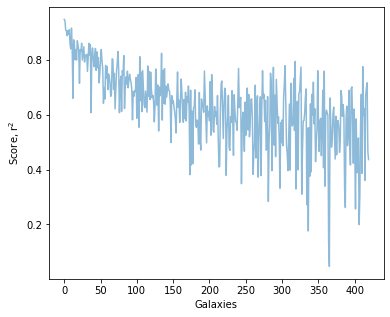

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
plt.xticks(np.arange(int(results['means'].index[0]),int(results['means'].index[-1]),50))
plt.xlabel('Galaxies')
plt.ylabel('Score, $\\mathrm{r}^2$')
plt.plot(results['means'], alpha=0.5)

# assessing set performance across all galaxies - amass_parameval

In [17]:
aggregate_means=gt.amass_parameval(results['means'])
aggregate_means

{'means':                    {'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2}  \
 performance_means                                           0.631128                                                       
 
                    {'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}  
 performance_means                                           0.197796                    ,
 'stds':                   {'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2}  \
 performance_stds                                           0.139302                                                       
 
                   {'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}  
 performance_stds                                           0.207691                    }

In [18]:
aggregate_means['means']

,{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2},{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}
performance_means,0.631128,0.197796


In [19]:
aggregate_means['stds']

,{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2 + RBF(length_scale=0.01) * 0.1**2},{'kernel': RBF(length_scale=10) + RBF(length_scale=0.1) * 0.316**2}
performance_stds,0.139302,0.207691


# use of random states - randstates_parameval

In [ ]:
#the processes within different random states
random_state_results=gt.randstates_parameval(model=gpr,random_states=[1,2,3],parameters=parameters,splits=3)




0. Grid searching with random_state = 1

0. Grid searching for Galaxy 0


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


1. Grid searching for Galaxy 1
2. Grid searching for Galaxy 2
3. Grid searching for Galaxy 3
4. Grid searching for Galaxy 4
5. Grid searching for Galaxy 5
6. Grid searching for Galaxy 6
7. Grid searching for Galaxy 7
8. Grid searching for Galaxy 8
9. Grid searching for Galaxy 9
10. Grid searching for Galaxy 10
11. Grid searching for Galaxy 11
12. Grid searching for Galaxy 12


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


13. Grid searching for Galaxy 13
14. Grid searching for Galaxy 14
15. Grid searching for Galaxy 15
16. Grid searching for Galaxy 16
17. Grid searching for Galaxy 17
18. Grid searching for Galaxy 18
19. Grid searching for Galaxy 19


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


20. Grid searching for Galaxy 20
21. Grid searching for Galaxy 21
22. Grid searching for Galaxy 22
23. Grid searching for Galaxy 23
24. Grid searching for Galaxy 24
25. Grid searching for Galaxy 25
26. Grid searching for Galaxy 26
27. Grid searching for Galaxy 27
28. Grid searching for Galaxy 28
29. Grid searching for Galaxy 29
30. Grid searching for Galaxy 30
31. Grid searching for Galaxy 31
32. Grid searching for Galaxy 32
33. Grid searching for Galaxy 33
34. Grid searching for Galaxy 34
35. Grid searching for Galaxy 35
36. Grid searching for Galaxy 36
37. Grid searching for Galaxy 37


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


38. Grid searching for Galaxy 38
39. Grid searching for Galaxy 39
40. Grid searching for Galaxy 40


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


41. Grid searching for Galaxy 41
42. Grid searching for Galaxy 42
43. Grid searching for Galaxy 43
44. Grid searching for Galaxy 44
45. Grid searching for Galaxy 45


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


46. Grid searching for Galaxy 46
47. Grid searching for Galaxy 47
48. Grid searching for Galaxy 48
49. Grid searching for Galaxy 49
50. Grid searching for Galaxy 50
51. Grid searching for Galaxy 51
52. Grid searching for Galaxy 52
53. Grid searching for Galaxy 53
54. Grid searching for Galaxy 54
55. Grid searching for Galaxy 55
56. Grid searching for Galaxy 56
57. Grid searching for Galaxy 57
58. Grid searching for Galaxy 58
59. Grid searching for Galaxy 59
60. Grid searching for Galaxy 60
61. Grid searching for Galaxy 61
62. Grid searching for Galaxy 62
63. Grid searching for Galaxy 63
64. Grid searching for Galaxy 64
65. Grid searching for Galaxy 65
66. Grid searching for Galaxy 66
67. Grid searching for Galaxy 67
68. Grid searching for Galaxy 68
69. Grid searching for Galaxy 69
70. Grid searching for Galaxy 70
71. Grid searching for Galaxy 71


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


72. Grid searching for Galaxy 72
73. Grid searching for Galaxy 73
74. Grid searching for Galaxy 74
75. Grid searching for Galaxy 75
76. Grid searching for Galaxy 76
77. Grid searching for Galaxy 77
78. Grid searching for Galaxy 78
79. Grid searching for Galaxy 79
80. Grid searching for Galaxy 80
81. Grid searching for Galaxy 81
82. Grid searching for Galaxy 82
83. Grid searching for Galaxy 83
84. Grid searching for Galaxy 84
85. Grid searching for Galaxy 85
86. Grid searching for Galaxy 86
87. Grid searching for Galaxy 87
88. Grid searching for Galaxy 88
89. Grid searching for Galaxy 89
90. Grid searching for Galaxy 90
91. Grid searching for Galaxy 91
92. Grid searching for Galaxy 92


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


93. Grid searching for Galaxy 93
94. Grid searching for Galaxy 94
95. Grid searching for Galaxy 95
96. Grid searching for Galaxy 96
97. Grid searching for Galaxy 97


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


98. Grid searching for Galaxy 98
99. Grid searching for Galaxy 99
100. Grid searching for Galaxy 100


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


101. Grid searching for Galaxy 101
102. Grid searching for Galaxy 102
103. Grid searching for Galaxy 103
104. Grid searching for Galaxy 104
105. Grid searching for Galaxy 105
106. Grid searching for Galaxy 106
107. Grid searching for Galaxy 107
108. Grid searching for Galaxy 108
109. Grid searching for Galaxy 109
110. Grid searching for Galaxy 110


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


111. Grid searching for Galaxy 111
112. Grid searching for Galaxy 112
113. Grid searching for Galaxy 113
114. Grid searching for Galaxy 114
115. Grid searching for Galaxy 115
116. Grid searching for Galaxy 116


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


117. Grid searching for Galaxy 117
118. Grid searching for Galaxy 118


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


119. Grid searching for Galaxy 119


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


120. Grid searching for Galaxy 120
121. Grid searching for Galaxy 121
122. Grid searching for Galaxy 122
123. Grid searching for Galaxy 123
124. Grid searching for Galaxy 124
125. Grid searching for Galaxy 125
126. Grid searching for Galaxy 126
127. Grid searching for Galaxy 127
128. Grid searching for Galaxy 128


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


129. Grid searching for Galaxy 129
130. Grid searching for Galaxy 130
131. Grid searching for Galaxy 131
132. Grid searching for Galaxy 132


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


133. Grid searching for Galaxy 133
134. Grid searching for Galaxy 134
135. Grid searching for Galaxy 135
136. Grid searching for Galaxy 136
137. Grid searching for Galaxy 137
138. Grid searching for Galaxy 138
139. Grid searching for Galaxy 139
140. Grid searching for Galaxy 140
141. Grid searching for Galaxy 141
142. Grid searching for Galaxy 142
143. Grid searching for Galaxy 143
144. Grid searching for Galaxy 144
145. Grid searching for Galaxy 145
146. Grid searching for Galaxy 146
147. Grid searching for Galaxy 147
148. Grid searching for Galaxy 148
149. Grid searching for Galaxy 149
150. Grid searching for Galaxy 150
151. Grid searching for Galaxy 151


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


152. Grid searching for Galaxy 152


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


153. Grid searching for Galaxy 153
154. Grid searching for Galaxy 154
155. Grid searching for Galaxy 155
156. Grid searching for Galaxy 156
157. Grid searching for Galaxy 157
158. Grid searching for Galaxy 158
159. Grid searching for Galaxy 159
160. Grid searching for Galaxy 160
161. Grid searching for Galaxy 161
162. Grid searching for Galaxy 162
163. Grid searching for Galaxy 163
164. Grid searching for Galaxy 164
165. Grid searching for Galaxy 165
166. Grid searching for Galaxy 166
167. Grid searching for Galaxy 167
168. Grid searching for Galaxy 168
169. Grid searching for Galaxy 169
170. Grid searching for Galaxy 170
171. Grid searching for Galaxy 171
172. Grid searching for Galaxy 172
173. Grid searching for Galaxy 173
174. Grid searching for Galaxy 174
175. Grid searching for Galaxy 175


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


176. Grid searching for Galaxy 176
177. Grid searching for Galaxy 177


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


178. Grid searching for Galaxy 178
179. Grid searching for Galaxy 179
180. Grid searching for Galaxy 180


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


181. Grid searching for Galaxy 181
182. Grid searching for Galaxy 182
183. Grid searching for Galaxy 183
184. Grid searching for Galaxy 184
185. Grid searching for Galaxy 185
186. Grid searching for Galaxy 186
187. Grid searching for Galaxy 187
188. Grid searching for Galaxy 188
189. Grid searching for Galaxy 189
190. Grid searching for Galaxy 190
191. Grid searching for Galaxy 191
192. Grid searching for Galaxy 192
193. Grid searching for Galaxy 193
194. Grid searching for Galaxy 194
195. Grid searching for Galaxy 195
196. Grid searching for Galaxy 196


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


197. Grid searching for Galaxy 197
198. Grid searching for Galaxy 198
199. Grid searching for Galaxy 199
200. Grid searching for Galaxy 200
201. Grid searching for Galaxy 201
202. Grid searching for Galaxy 202
203. Grid searching for Galaxy 203
204. Grid searching for Galaxy 204
205. Grid searching for Galaxy 205
206. Grid searching for Galaxy 206
207. Grid searching for Galaxy 207
208. Grid searching for Galaxy 208


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


209. Grid searching for Galaxy 209
210. Grid searching for Galaxy 210


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


211. Grid searching for Galaxy 211
212. Grid searching for Galaxy 212
213. Grid searching for Galaxy 213
214. Grid searching for Galaxy 214


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


215. Grid searching for Galaxy 215
216. Grid searching for Galaxy 216
217. Grid searching for Galaxy 217


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


218. Grid searching for Galaxy 218


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


219. Grid searching for Galaxy 219


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


220. Grid searching for Galaxy 220
221. Grid searching for Galaxy 221
222. Grid searching for Galaxy 222


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


223. Grid searching for Galaxy 223
224. Grid searching for Galaxy 224
225. Grid searching for Galaxy 225
226. Grid searching for Galaxy 226
227. Grid searching for Galaxy 227
228. Grid searching for Galaxy 228
229. Grid searching for Galaxy 229
230. Grid searching for Galaxy 230
231. Grid searching for Galaxy 231
232. Grid searching for Galaxy 232
233. Grid searching for Galaxy 233


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


234. Grid searching for Galaxy 234
235. Grid searching for Galaxy 235
236. Grid searching for Galaxy 236
237. Grid searching for Galaxy 237
238. Grid searching for Galaxy 238
239. Grid searching for Galaxy 239
240. Grid searching for Galaxy 240
241. Grid searching for Galaxy 241
242. Grid searching for Galaxy 242
243. Grid searching for Galaxy 243
244. Grid searching for Galaxy 244
245. Grid searching for Galaxy 245
246. Grid searching for Galaxy 246
247. Grid searching for Galaxy 247
248. Grid searching for Galaxy 248
249. Grid searching for Galaxy 249
250. Grid searching for Galaxy 250
251. Grid searching for Galaxy 251
252. Grid searching for Galaxy 252
253. Grid searching for Galaxy 253
254. Grid searching for Galaxy 254
255. Grid searching for Galaxy 255
256. Grid searching for Galaxy 256
257. Grid searching for Galaxy 257
258. Grid searching for Galaxy 258
259. Grid searching for Galaxy 259


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


260. Grid searching for Galaxy 260
261. Grid searching for Galaxy 261
262. Grid searching for Galaxy 262
263. Grid searching for Galaxy 263
264. Grid searching for Galaxy 264
265. Grid searching for Galaxy 265


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


266. Grid searching for Galaxy 266
267. Grid searching for Galaxy 267
268. Grid searching for Galaxy 268
269. Grid searching for Galaxy 269
270. Grid searching for Galaxy 270
271. Grid searching for Galaxy 271
272. Grid searching for Galaxy 272
273. Grid searching for Galaxy 273
274. Grid searching for Galaxy 274
275. Grid searching for Galaxy 275
276. Grid searching for Galaxy 276
277. Grid searching for Galaxy 277
278. Grid searching for Galaxy 278
279. Grid searching for Galaxy 279


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


280. Grid searching for Galaxy 280
281. Grid searching for Galaxy 281
282. Grid searching for Galaxy 282
283. Grid searching for Galaxy 283


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


284. Grid searching for Galaxy 284
285. Grid searching for Galaxy 285
286. Grid searching for Galaxy 286
287. Grid searching for Galaxy 287
288. Grid searching for Galaxy 288
289. Grid searching for Galaxy 289
290. Grid searching for Galaxy 290
291. Grid searching for Galaxy 291


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


292. Grid searching for Galaxy 292
293. Grid searching for Galaxy 293
294. Grid searching for Galaxy 294


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


295. Grid searching for Galaxy 295
296. Grid searching for Galaxy 296
297. Grid searching for Galaxy 297
298. Grid searching for Galaxy 298
299. Grid searching for Galaxy 299
300. Grid searching for Galaxy 300
301. Grid searching for Galaxy 301
302. Grid searching for Galaxy 302
303. Grid searching for Galaxy 303
304. Grid searching for Galaxy 304
305. Grid searching for Galaxy 305
306. Grid searching for Galaxy 306
307. Grid searching for Galaxy 307
308. Grid searching for Galaxy 308
309. Grid searching for Galaxy 309


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


310. Grid searching for Galaxy 310
311. Grid searching for Galaxy 311
312. Grid searching for Galaxy 312
313. Grid searching for Galaxy 313


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


314. Grid searching for Galaxy 314


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


315. Grid searching for Galaxy 315
316. Grid searching for Galaxy 316


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


317. Grid searching for Galaxy 317
318. Grid searching for Galaxy 318
319. Grid searching for Galaxy 319
320. Grid searching for Galaxy 320
321. Grid searching for Galaxy 321
322. Grid searching for Galaxy 322
323. Grid searching for Galaxy 323
324. Grid searching for Galaxy 324
325. Grid searching for Galaxy 325
326. Grid searching for Galaxy 326
327. Grid searching for Galaxy 327
328. Grid searching for Galaxy 328
329. Grid searching for Galaxy 329


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


330. Grid searching for Galaxy 330
331. Grid searching for Galaxy 331
332. Grid searching for Galaxy 332
333. Grid searching for Galaxy 333
334. Grid searching for Galaxy 334
335. Grid searching for Galaxy 335
336. Grid searching for Galaxy 336
337. Grid searching for Galaxy 337
338. Grid searching for Galaxy 338
339. Grid searching for Galaxy 339
340. Grid searching for Galaxy 340
341. Grid searching for Galaxy 341
342. Grid searching for Galaxy 342
343. Grid searching for Galaxy 343


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


344. Grid searching for Galaxy 344
345. Grid searching for Galaxy 345
346. Grid searching for Galaxy 346
347. Grid searching for Galaxy 347


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


348. Grid searching for Galaxy 348


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


349. Grid searching for Galaxy 349
350. Grid searching for Galaxy 350
351. Grid searching for Galaxy 351
352. Grid searching for Galaxy 352
353. Grid searching for Galaxy 353
354. Grid searching for Galaxy 354
355. Grid searching for Galaxy 355
356. Grid searching for Galaxy 356
357. Grid searching for Galaxy 357
358. Grid searching for Galaxy 358
359. Grid searching for Galaxy 359


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


360. Grid searching for Galaxy 360
361. Grid searching for Galaxy 361
362. Grid searching for Galaxy 362
363. Grid searching for Galaxy 363
364. Grid searching for Galaxy 364


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


365. Grid searching for Galaxy 365
366. Grid searching for Galaxy 366


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


367. Grid searching for Galaxy 367
368. Grid searching for Galaxy 368
369. Grid searching for Galaxy 369
370. Grid searching for Galaxy 370


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


371. Grid searching for Galaxy 371
372. Grid searching for Galaxy 372
373. Grid searching for Galaxy 373
374. Grid searching for Galaxy 374


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


375. Grid searching for Galaxy 375
376. Grid searching for Galaxy 376
377. Grid searching for Galaxy 377
378. Grid searching for Galaxy 378
379. Grid searching for Galaxy 379


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


380. Grid searching for Galaxy 380
381. Grid searching for Galaxy 381
382. Grid searching for Galaxy 382
383. Grid searching for Galaxy 383
384. Grid searching for Galaxy 384
385. Grid searching for Galaxy 385
386. Grid searching for Galaxy 386
387. Grid searching for Galaxy 387


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


388. Grid searching for Galaxy 388
389. Grid searching for Galaxy 389
390. Grid searching for Galaxy 390
391. Grid searching for Galaxy 391
392. Grid searching for Galaxy 392
393. Grid searching for Galaxy 393
394. Grid searching for Galaxy 394
395. Grid searching for Galaxy 395


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


396. Grid searching for Galaxy 396
397. Grid searching for Galaxy 397
398. Grid searching for Galaxy 398
399. Grid searching for Galaxy 399
400. Grid searching for Galaxy 400
401. Grid searching for Galaxy 401
402. Grid searching for Galaxy 402
403. Grid searching for Galaxy 403
404. Grid searching for Galaxy 404
405. Grid searching for Galaxy 405
406. Grid searching for Galaxy 406
407. Grid searching for Galaxy 407
408. Grid searching for Galaxy 408
409. Grid searching for Galaxy 409
410. Grid searching for Galaxy 410
411. Grid searching for Galaxy 411
412. Grid searching for Galaxy 412


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


413. Grid searching for Galaxy 413
414. Grid searching for Galaxy 414
415. Grid searching for Galaxy 415
416. Grid searching for Galaxy 416
417. Grid searching for Galaxy 417
418. Grid searching for Galaxy 418
419. Grid searching for Galaxy 419


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)





1. Grid searching with random_state = 2

0. Grid searching for Galaxy 0
1. Grid searching for Galaxy 1
2. Grid searching for Galaxy 2


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


3. Grid searching for Galaxy 3
4. Grid searching for Galaxy 4
5. Grid searching for Galaxy 5
6. Grid searching for Galaxy 6
7. Grid searching for Galaxy 7
8. Grid searching for Galaxy 8
9. Grid searching for Galaxy 9
10. Grid searching for Galaxy 10
11. Grid searching for Galaxy 11
12. Grid searching for Galaxy 12
13. Grid searching for Galaxy 13
14. Grid searching for Galaxy 14
15. Grid searching for Galaxy 15
16. Grid searching for Galaxy 16
17. Grid searching for Galaxy 17
18. Grid searching for Galaxy 18
19. Grid searching for Galaxy 19
20. Grid searching for Galaxy 20
21. Grid searching for Galaxy 21
22. Grid searching for Galaxy 22
23. Grid searching for Galaxy 23
24. Grid searching for Galaxy 24
25. Grid searching for Galaxy 25
26. Grid searching for Galaxy 26
27. Grid searching for Galaxy 27
28. Grid searching for Galaxy 28


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


29. Grid searching for Galaxy 29


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


30. Grid searching for Galaxy 30
31. Grid searching for Galaxy 31
32. Grid searching for Galaxy 32
33. Grid searching for Galaxy 33
34. Grid searching for Galaxy 34
35. Grid searching for Galaxy 35
36. Grid searching for Galaxy 36
37. Grid searching for Galaxy 37
38. Grid searching for Galaxy 38
39. Grid searching for Galaxy 39
40. Grid searching for Galaxy 40
41. Grid searching for Galaxy 41
42. Grid searching for Galaxy 42
43. Grid searching for Galaxy 43
44. Grid searching for Galaxy 44
45. Grid searching for Galaxy 45


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


46. Grid searching for Galaxy 46
47. Grid searching for Galaxy 47
48. Grid searching for Galaxy 48
49. Grid searching for Galaxy 49
50. Grid searching for Galaxy 50
51. Grid searching for Galaxy 51
52. Grid searching for Galaxy 52
53. Grid searching for Galaxy 53
54. Grid searching for Galaxy 54
55. Grid searching for Galaxy 55
56. Grid searching for Galaxy 56
57. Grid searching for Galaxy 57
58. Grid searching for Galaxy 58
59. Grid searching for Galaxy 59
60. Grid searching for Galaxy 60
61. Grid searching for Galaxy 61
62. Grid searching for Galaxy 62
63. Grid searching for Galaxy 63
64. Grid searching for Galaxy 64


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


65. Grid searching for Galaxy 65
66. Grid searching for Galaxy 66
67. Grid searching for Galaxy 67
68. Grid searching for Galaxy 68
69. Grid searching for Galaxy 69


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


70. Grid searching for Galaxy 70
71. Grid searching for Galaxy 71
72. Grid searching for Galaxy 72
73. Grid searching for Galaxy 73
74. Grid searching for Galaxy 74
75. Grid searching for Galaxy 75
76. Grid searching for Galaxy 76
77. Grid searching for Galaxy 77


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


78. Grid searching for Galaxy 78
79. Grid searching for Galaxy 79
80. Grid searching for Galaxy 80
81. Grid searching for Galaxy 81
82. Grid searching for Galaxy 82
83. Grid searching for Galaxy 83
84. Grid searching for Galaxy 84
85. Grid searching for Galaxy 85
86. Grid searching for Galaxy 86
87. Grid searching for Galaxy 87
88. Grid searching for Galaxy 88
89. Grid searching for Galaxy 89
90. Grid searching for Galaxy 90
91. Grid searching for Galaxy 91


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


92. Grid searching for Galaxy 92
93. Grid searching for Galaxy 93
94. Grid searching for Galaxy 94


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


95. Grid searching for Galaxy 95
96. Grid searching for Galaxy 96
97. Grid searching for Galaxy 97
98. Grid searching for Galaxy 98
99. Grid searching for Galaxy 99
100. Grid searching for Galaxy 100
101. Grid searching for Galaxy 101
102. Grid searching for Galaxy 102
103. Grid searching for Galaxy 103
104. Grid searching for Galaxy 104
105. Grid searching for Galaxy 105
106. Grid searching for Galaxy 106
107. Grid searching for Galaxy 107
108. Grid searching for Galaxy 108
109. Grid searching for Galaxy 109
110. Grid searching for Galaxy 110


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


111. Grid searching for Galaxy 111
112. Grid searching for Galaxy 112
113. Grid searching for Galaxy 113
114. Grid searching for Galaxy 114
115. Grid searching for Galaxy 115
116. Grid searching for Galaxy 116
117. Grid searching for Galaxy 117
118. Grid searching for Galaxy 118
119. Grid searching for Galaxy 119
120. Grid searching for Galaxy 120
121. Grid searching for Galaxy 121
122. Grid searching for Galaxy 122
123. Grid searching for Galaxy 123
124. Grid searching for Galaxy 124
125. Grid searching for Galaxy 125
126. Grid searching for Galaxy 126


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


127. Grid searching for Galaxy 127
128. Grid searching for Galaxy 128
129. Grid searching for Galaxy 129
130. Grid searching for Galaxy 130
131. Grid searching for Galaxy 131
132. Grid searching for Galaxy 132
133. Grid searching for Galaxy 133
134. Grid searching for Galaxy 134
135. Grid searching for Galaxy 135
136. Grid searching for Galaxy 136
137. Grid searching for Galaxy 137
138. Grid searching for Galaxy 138
139. Grid searching for Galaxy 139
140. Grid searching for Galaxy 140
141. Grid searching for Galaxy 141
142. Grid searching for Galaxy 142
143. Grid searching for Galaxy 143
144. Grid searching for Galaxy 144
145. Grid searching for Galaxy 145
146. Grid searching for Galaxy 146
147. Grid searching for Galaxy 147
148. Grid searching for Galaxy 148


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


149. Grid searching for Galaxy 149
150. Grid searching for Galaxy 150
151. Grid searching for Galaxy 151
152. Grid searching for Galaxy 152
153. Grid searching for Galaxy 153
154. Grid searching for Galaxy 154


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


155. Grid searching for Galaxy 155
156. Grid searching for Galaxy 156
157. Grid searching for Galaxy 157
158. Grid searching for Galaxy 158
159. Grid searching for Galaxy 159
160. Grid searching for Galaxy 160
161. Grid searching for Galaxy 161
162. Grid searching for Galaxy 162
163. Grid searching for Galaxy 163
164. Grid searching for Galaxy 164
165. Grid searching for Galaxy 165
166. Grid searching for Galaxy 166
167. Grid searching for Galaxy 167
168. Grid searching for Galaxy 168
169. Grid searching for Galaxy 169
170. Grid searching for Galaxy 170
171. Grid searching for Galaxy 171
172. Grid searching for Galaxy 172
173. Grid searching for Galaxy 173
174. Grid searching for Galaxy 174


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


175. Grid searching for Galaxy 175
176. Grid searching for Galaxy 176
177. Grid searching for Galaxy 177


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


178. Grid searching for Galaxy 178
179. Grid searching for Galaxy 179
180. Grid searching for Galaxy 180


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


181. Grid searching for Galaxy 181
182. Grid searching for Galaxy 182


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


183. Grid searching for Galaxy 183
184. Grid searching for Galaxy 184
185. Grid searching for Galaxy 185
186. Grid searching for Galaxy 186
187. Grid searching for Galaxy 187


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


188. Grid searching for Galaxy 188
189. Grid searching for Galaxy 189
190. Grid searching for Galaxy 190
191. Grid searching for Galaxy 191
192. Grid searching for Galaxy 192
193. Grid searching for Galaxy 193
194. Grid searching for Galaxy 194
195. Grid searching for Galaxy 195
196. Grid searching for Galaxy 196
197. Grid searching for Galaxy 197
198. Grid searching for Galaxy 198
199. Grid searching for Galaxy 199
200. Grid searching for Galaxy 200
201. Grid searching for Galaxy 201
202. Grid searching for Galaxy 202
203. Grid searching for Galaxy 203
204. Grid searching for Galaxy 204
205. Grid searching for Galaxy 205
206. Grid searching for Galaxy 206


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


207. Grid searching for Galaxy 207
208. Grid searching for Galaxy 208
209. Grid searching for Galaxy 209
210. Grid searching for Galaxy 210
211. Grid searching for Galaxy 211
212. Grid searching for Galaxy 212
213. Grid searching for Galaxy 213
214. Grid searching for Galaxy 214
215. Grid searching for Galaxy 215
216. Grid searching for Galaxy 216
217. Grid searching for Galaxy 217


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


218. Grid searching for Galaxy 218
219. Grid searching for Galaxy 219
220. Grid searching for Galaxy 220


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


221. Grid searching for Galaxy 221
222. Grid searching for Galaxy 222


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


223. Grid searching for Galaxy 223
224. Grid searching for Galaxy 224
225. Grid searching for Galaxy 225
226. Grid searching for Galaxy 226
227. Grid searching for Galaxy 227
228. Grid searching for Galaxy 228


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


229. Grid searching for Galaxy 229
230. Grid searching for Galaxy 230
231. Grid searching for Galaxy 231
232. Grid searching for Galaxy 232
233. Grid searching for Galaxy 233
234. Grid searching for Galaxy 234
235. Grid searching for Galaxy 235
236. Grid searching for Galaxy 236
237. Grid searching for Galaxy 237
238. Grid searching for Galaxy 238
239. Grid searching for Galaxy 239


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


240. Grid searching for Galaxy 240
241. Grid searching for Galaxy 241
242. Grid searching for Galaxy 242
243. Grid searching for Galaxy 243
244. Grid searching for Galaxy 244
245. Grid searching for Galaxy 245
246. Grid searching for Galaxy 246
247. Grid searching for Galaxy 247
248. Grid searching for Galaxy 248
249. Grid searching for Galaxy 249
250. Grid searching for Galaxy 250
251. Grid searching for Galaxy 251
252. Grid searching for Galaxy 252
253. Grid searching for Galaxy 253
254. Grid searching for Galaxy 254
255. Grid searching for Galaxy 255
256. Grid searching for Galaxy 256
257. Grid searching for Galaxy 257
258. Grid searching for Galaxy 258


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


259. Grid searching for Galaxy 259
260. Grid searching for Galaxy 260
261. Grid searching for Galaxy 261
262. Grid searching for Galaxy 262
263. Grid searching for Galaxy 263
264. Grid searching for Galaxy 264
265. Grid searching for Galaxy 265
266. Grid searching for Galaxy 266
267. Grid searching for Galaxy 267
268. Grid searching for Galaxy 268
269. Grid searching for Galaxy 269


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


270. Grid searching for Galaxy 270
271. Grid searching for Galaxy 271


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


272. Grid searching for Galaxy 272
273. Grid searching for Galaxy 273
274. Grid searching for Galaxy 274
275. Grid searching for Galaxy 275
276. Grid searching for Galaxy 276
277. Grid searching for Galaxy 277
278. Grid searching for Galaxy 278
279. Grid searching for Galaxy 279
280. Grid searching for Galaxy 280
281. Grid searching for Galaxy 281
282. Grid searching for Galaxy 282
283. Grid searching for Galaxy 283
284. Grid searching for Galaxy 284
285. Grid searching for Galaxy 285
286. Grid searching for Galaxy 286
287. Grid searching for Galaxy 287
288. Grid searching for Galaxy 288
289. Grid searching for Galaxy 289
290. Grid searching for Galaxy 290
291. Grid searching for Galaxy 291
292. Grid searching for Galaxy 292
293. Grid searching for Galaxy 293
294. Grid searching for Galaxy 294
295. Grid searching for Galaxy 295
296. Grid searching for Galaxy 296
297. Grid searching for Galaxy 297
298. Grid searching for Galaxy 298
299. Grid searching for Galaxy 299
300. Grid searching 

/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


308. Grid searching for Galaxy 308
309. Grid searching for Galaxy 309


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


310. Grid searching for Galaxy 310
311. Grid searching for Galaxy 311
312. Grid searching for Galaxy 312
313. Grid searching for Galaxy 313
314. Grid searching for Galaxy 314
315. Grid searching for Galaxy 315
316. Grid searching for Galaxy 316
317. Grid searching for Galaxy 317
318. Grid searching for Galaxy 318
319. Grid searching for Galaxy 319
320. Grid searching for Galaxy 320
321. Grid searching for Galaxy 321
322. Grid searching for Galaxy 322
323. Grid searching for Galaxy 323
324. Grid searching for Galaxy 324
325. Grid searching for Galaxy 325
326. Grid searching for Galaxy 326
327. Grid searching for Galaxy 327
328. Grid searching for Galaxy 328
329. Grid searching for Galaxy 329
330. Grid searching for Galaxy 330


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


331. Grid searching for Galaxy 331
332. Grid searching for Galaxy 332
333. Grid searching for Galaxy 333
334. Grid searching for Galaxy 334
335. Grid searching for Galaxy 335
336. Grid searching for Galaxy 336
337. Grid searching for Galaxy 337
338. Grid searching for Galaxy 338


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


339. Grid searching for Galaxy 339
340. Grid searching for Galaxy 340
341. Grid searching for Galaxy 341
342. Grid searching for Galaxy 342
343. Grid searching for Galaxy 343


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


344. Grid searching for Galaxy 344
345. Grid searching for Galaxy 345
346. Grid searching for Galaxy 346
347. Grid searching for Galaxy 347
348. Grid searching for Galaxy 348
349. Grid searching for Galaxy 349
350. Grid searching for Galaxy 350
351. Grid searching for Galaxy 351
352. Grid searching for Galaxy 352
353. Grid searching for Galaxy 353
354. Grid searching for Galaxy 354
355. Grid searching for Galaxy 355
356. Grid searching for Galaxy 356
357. Grid searching for Galaxy 357
358. Grid searching for Galaxy 358
359. Grid searching for Galaxy 359
360. Grid searching for Galaxy 360
361. Grid searching for Galaxy 361
362. Grid searching for Galaxy 362
363. Grid searching for Galaxy 363
364. Grid searching for Galaxy 364
365. Grid searching for Galaxy 365
366. Grid searching for Galaxy 366
367. Grid searching for Galaxy 367
368. Grid searching for Galaxy 368
369. Grid searching for Galaxy 369
370. Grid searching for Galaxy 370
371. Grid searching for Galaxy 371
372. Grid searching 

/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


399. Grid searching for Galaxy 399
400. Grid searching for Galaxy 400
401. Grid searching for Galaxy 401


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


402. Grid searching for Galaxy 402


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


403. Grid searching for Galaxy 403
404. Grid searching for Galaxy 404
405. Grid searching for Galaxy 405
406. Grid searching for Galaxy 406
407. Grid searching for Galaxy 407
408. Grid searching for Galaxy 408
409. Grid searching for Galaxy 409
410. Grid searching for Galaxy 410
411. Grid searching for Galaxy 411
412. Grid searching for Galaxy 412
413. Grid searching for Galaxy 413


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


414. Grid searching for Galaxy 414
415. Grid searching for Galaxy 415
416. Grid searching for Galaxy 416
417. Grid searching for Galaxy 417
418. Grid searching for Galaxy 418


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


419. Grid searching for Galaxy 419



2. Grid searching with random_state = 3

0. Grid searching for Galaxy 0
1. Grid searching for Galaxy 1


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


2. Grid searching for Galaxy 2
3. Grid searching for Galaxy 3
4. Grid searching for Galaxy 4
5. Grid searching for Galaxy 5
6. Grid searching for Galaxy 6
7. Grid searching for Galaxy 7
8. Grid searching for Galaxy 8


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


9. Grid searching for Galaxy 9
10. Grid searching for Galaxy 10
11. Grid searching for Galaxy 11
12. Grid searching for Galaxy 12
13. Grid searching for Galaxy 13
14. Grid searching for Galaxy 14
15. Grid searching for Galaxy 15
16. Grid searching for Galaxy 16
17. Grid searching for Galaxy 17
18. Grid searching for Galaxy 18
19. Grid searching for Galaxy 19
20. Grid searching for Galaxy 20
21. Grid searching for Galaxy 21
22. Grid searching for Galaxy 22
23. Grid searching for Galaxy 23
24. Grid searching for Galaxy 24
25. Grid searching for Galaxy 25
26. Grid searching for Galaxy 26
27. Grid searching for Galaxy 27
28. Grid searching for Galaxy 28
29. Grid searching for Galaxy 29


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


30. Grid searching for Galaxy 30


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


31. Grid searching for Galaxy 31
32. Grid searching for Galaxy 32
33. Grid searching for Galaxy 33
34. Grid searching for Galaxy 34
35. Grid searching for Galaxy 35
36. Grid searching for Galaxy 36
37. Grid searching for Galaxy 37
38. Grid searching for Galaxy 38


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


39. Grid searching for Galaxy 39
40. Grid searching for Galaxy 40
41. Grid searching for Galaxy 41
42. Grid searching for Galaxy 42
43. Grid searching for Galaxy 43
44. Grid searching for Galaxy 44
45. Grid searching for Galaxy 45
46. Grid searching for Galaxy 46
47. Grid searching for Galaxy 47
48. Grid searching for Galaxy 48
49. Grid searching for Galaxy 49


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


50. Grid searching for Galaxy 50
51. Grid searching for Galaxy 51
52. Grid searching for Galaxy 52
53. Grid searching for Galaxy 53


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


54. Grid searching for Galaxy 54
55. Grid searching for Galaxy 55
56. Grid searching for Galaxy 56
57. Grid searching for Galaxy 57
58. Grid searching for Galaxy 58
59. Grid searching for Galaxy 59
60. Grid searching for Galaxy 60
61. Grid searching for Galaxy 61
62. Grid searching for Galaxy 62
63. Grid searching for Galaxy 63


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


64. Grid searching for Galaxy 64
65. Grid searching for Galaxy 65
66. Grid searching for Galaxy 66
67. Grid searching for Galaxy 67
68. Grid searching for Galaxy 68
69. Grid searching for Galaxy 69
70. Grid searching for Galaxy 70
71. Grid searching for Galaxy 71
72. Grid searching for Galaxy 72
73. Grid searching for Galaxy 73
74. Grid searching for Galaxy 74
75. Grid searching for Galaxy 75
76. Grid searching for Galaxy 76
77. Grid searching for Galaxy 77


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


78. Grid searching for Galaxy 78
79. Grid searching for Galaxy 79
80. Grid searching for Galaxy 80


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


81. Grid searching for Galaxy 81
82. Grid searching for Galaxy 82
83. Grid searching for Galaxy 83


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


84. Grid searching for Galaxy 84
85. Grid searching for Galaxy 85
86. Grid searching for Galaxy 86
87. Grid searching for Galaxy 87
88. Grid searching for Galaxy 88
89. Grid searching for Galaxy 89
90. Grid searching for Galaxy 90
91. Grid searching for Galaxy 91
92. Grid searching for Galaxy 92
93. Grid searching for Galaxy 93
94. Grid searching for Galaxy 94
95. Grid searching for Galaxy 95
96. Grid searching for Galaxy 96
97. Grid searching for Galaxy 97


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


98. Grid searching for Galaxy 98


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


99. Grid searching for Galaxy 99


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


100. Grid searching for Galaxy 100
101. Grid searching for Galaxy 101
102. Grid searching for Galaxy 102
103. Grid searching for Galaxy 103
104. Grid searching for Galaxy 104


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


105. Grid searching for Galaxy 105
106. Grid searching for Galaxy 106
107. Grid searching for Galaxy 107
108. Grid searching for Galaxy 108


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


109. Grid searching for Galaxy 109
110. Grid searching for Galaxy 110
111. Grid searching for Galaxy 111
112. Grid searching for Galaxy 112
113. Grid searching for Galaxy 113


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


114. Grid searching for Galaxy 114
115. Grid searching for Galaxy 115


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


116. Grid searching for Galaxy 116
117. Grid searching for Galaxy 117
118. Grid searching for Galaxy 118
119. Grid searching for Galaxy 119


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


120. Grid searching for Galaxy 120
121. Grid searching for Galaxy 121
122. Grid searching for Galaxy 122
123. Grid searching for Galaxy 123
124. Grid searching for Galaxy 124


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


125. Grid searching for Galaxy 125
126. Grid searching for Galaxy 126
127. Grid searching for Galaxy 127
128. Grid searching for Galaxy 128
129. Grid searching for Galaxy 129
130. Grid searching for Galaxy 130
131. Grid searching for Galaxy 131
132. Grid searching for Galaxy 132
133. Grid searching for Galaxy 133
134. Grid searching for Galaxy 134
135. Grid searching for Galaxy 135
136. Grid searching for Galaxy 136
137. Grid searching for Galaxy 137
138. Grid searching for Galaxy 138
139. Grid searching for Galaxy 139
140. Grid searching for Galaxy 140
141. Grid searching for Galaxy 141
142. Grid searching for Galaxy 142
143. Grid searching for Galaxy 143
144. Grid searching for Galaxy 144
145. Grid searching for Galaxy 145
146. Grid searching for Galaxy 146
147. Grid searching for Galaxy 147
148. Grid searching for Galaxy 148


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


149. Grid searching for Galaxy 149
150. Grid searching for Galaxy 150
151. Grid searching for Galaxy 151
152. Grid searching for Galaxy 152
153. Grid searching for Galaxy 153
154. Grid searching for Galaxy 154


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


155. Grid searching for Galaxy 155
156. Grid searching for Galaxy 156
157. Grid searching for Galaxy 157
158. Grid searching for Galaxy 158
159. Grid searching for Galaxy 159
160. Grid searching for Galaxy 160
161. Grid searching for Galaxy 161
162. Grid searching for Galaxy 162
163. Grid searching for Galaxy 163


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


164. Grid searching for Galaxy 164


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


165. Grid searching for Galaxy 165
166. Grid searching for Galaxy 166
167. Grid searching for Galaxy 167
168. Grid searching for Galaxy 168
169. Grid searching for Galaxy 169
170. Grid searching for Galaxy 170


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


171. Grid searching for Galaxy 171
172. Grid searching for Galaxy 172
173. Grid searching for Galaxy 173
174. Grid searching for Galaxy 174
175. Grid searching for Galaxy 175
176. Grid searching for Galaxy 176
177. Grid searching for Galaxy 177
178. Grid searching for Galaxy 178
179. Grid searching for Galaxy 179
180. Grid searching for Galaxy 180
181. Grid searching for Galaxy 181
182. Grid searching for Galaxy 182


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


183. Grid searching for Galaxy 183
184. Grid searching for Galaxy 184
185. Grid searching for Galaxy 185
186. Grid searching for Galaxy 186


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


187. Grid searching for Galaxy 187
188. Grid searching for Galaxy 188
189. Grid searching for Galaxy 189
190. Grid searching for Galaxy 190
191. Grid searching for Galaxy 191
192. Grid searching for Galaxy 192


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


193. Grid searching for Galaxy 193
194. Grid searching for Galaxy 194
195. Grid searching for Galaxy 195
196. Grid searching for Galaxy 196
197. Grid searching for Galaxy 197
198. Grid searching for Galaxy 198
199. Grid searching for Galaxy 199
200. Grid searching for Galaxy 200


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


201. Grid searching for Galaxy 201
202. Grid searching for Galaxy 202


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


203. Grid searching for Galaxy 203
204. Grid searching for Galaxy 204
205. Grid searching for Galaxy 205
206. Grid searching for Galaxy 206
207. Grid searching for Galaxy 207
208. Grid searching for Galaxy 208


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


209. Grid searching for Galaxy 209


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


210. Grid searching for Galaxy 210
211. Grid searching for Galaxy 211
212. Grid searching for Galaxy 212
213. Grid searching for Galaxy 213
214. Grid searching for Galaxy 214
215. Grid searching for Galaxy 215
216. Grid searching for Galaxy 216
217. Grid searching for Galaxy 217
218. Grid searching for Galaxy 218
219. Grid searching for Galaxy 219
220. Grid searching for Galaxy 220
221. Grid searching for Galaxy 221


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


222. Grid searching for Galaxy 222


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


223. Grid searching for Galaxy 223
224. Grid searching for Galaxy 224
225. Grid searching for Galaxy 225
226. Grid searching for Galaxy 226


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


227. Grid searching for Galaxy 227
228. Grid searching for Galaxy 228
229. Grid searching for Galaxy 229
230. Grid searching for Galaxy 230
231. Grid searching for Galaxy 231
232. Grid searching for Galaxy 232
233. Grid searching for Galaxy 233
234. Grid searching for Galaxy 234
235. Grid searching for Galaxy 235
236. Grid searching for Galaxy 236
237. Grid searching for Galaxy 237
238. Grid searching for Galaxy 238
239. Grid searching for Galaxy 239
240. Grid searching for Galaxy 240
241. Grid searching for Galaxy 241
242. Grid searching for Galaxy 242
243. Grid searching for Galaxy 243
244. Grid searching for Galaxy 244
245. Grid searching for Galaxy 245
246. Grid searching for Galaxy 246


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


247. Grid searching for Galaxy 247
248. Grid searching for Galaxy 248
249. Grid searching for Galaxy 249


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


250. Grid searching for Galaxy 250
251. Grid searching for Galaxy 251


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


252. Grid searching for Galaxy 252
253. Grid searching for Galaxy 253
254. Grid searching for Galaxy 254
255. Grid searching for Galaxy 255
256. Grid searching for Galaxy 256
257. Grid searching for Galaxy 257
258. Grid searching for Galaxy 258


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


259. Grid searching for Galaxy 259
260. Grid searching for Galaxy 260
261. Grid searching for Galaxy 261
262. Grid searching for Galaxy 262
263. Grid searching for Galaxy 263
264. Grid searching for Galaxy 264
265. Grid searching for Galaxy 265
266. Grid searching for Galaxy 266
267. Grid searching for Galaxy 267
268. Grid searching for Galaxy 268
269. Grid searching for Galaxy 269


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


270. Grid searching for Galaxy 270
271. Grid searching for Galaxy 271
272. Grid searching for Galaxy 272
273. Grid searching for Galaxy 273
274. Grid searching for Galaxy 274
275. Grid searching for Galaxy 275
276. Grid searching for Galaxy 276


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


277. Grid searching for Galaxy 277
278. Grid searching for Galaxy 278
279. Grid searching for Galaxy 279


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


280. Grid searching for Galaxy 280
281. Grid searching for Galaxy 281
282. Grid searching for Galaxy 282
283. Grid searching for Galaxy 283


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


284. Grid searching for Galaxy 284
285. Grid searching for Galaxy 285
286. Grid searching for Galaxy 286
287. Grid searching for Galaxy 287
288. Grid searching for Galaxy 288
289. Grid searching for Galaxy 289
290. Grid searching for Galaxy 290
291. Grid searching for Galaxy 291
292. Grid searching for Galaxy 292
293. Grid searching for Galaxy 293
294. Grid searching for Galaxy 294
295. Grid searching for Galaxy 295
296. Grid searching for Galaxy 296
297. Grid searching for Galaxy 297
298. Grid searching for Galaxy 298
299. Grid searching for Galaxy 299
300. Grid searching for Galaxy 300


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


301. Grid searching for Galaxy 301
302. Grid searching for Galaxy 302
303. Grid searching for Galaxy 303
304. Grid searching for Galaxy 304
305. Grid searching for Galaxy 305
306. Grid searching for Galaxy 306


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


307. Grid searching for Galaxy 307


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


308. Grid searching for Galaxy 308
309. Grid searching for Galaxy 309


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


310. Grid searching for Galaxy 310


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


311. Grid searching for Galaxy 311
312. Grid searching for Galaxy 312
313. Grid searching for Galaxy 313
314. Grid searching for Galaxy 314


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


315. Grid searching for Galaxy 315
316. Grid searching for Galaxy 316
317. Grid searching for Galaxy 317


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


318. Grid searching for Galaxy 318
319. Grid searching for Galaxy 319
320. Grid searching for Galaxy 320
321. Grid searching for Galaxy 321
322. Grid searching for Galaxy 322
323. Grid searching for Galaxy 323
324. Grid searching for Galaxy 324
325. Grid searching for Galaxy 325
326. Grid searching for Galaxy 326


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


327. Grid searching for Galaxy 327
328. Grid searching for Galaxy 328


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


329. Grid searching for Galaxy 329
330. Grid searching for Galaxy 330
331. Grid searching for Galaxy 331
332. Grid searching for Galaxy 332
333. Grid searching for Galaxy 333
334. Grid searching for Galaxy 334
335. Grid searching for Galaxy 335
336. Grid searching for Galaxy 336


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


337. Grid searching for Galaxy 337


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


338. Grid searching for Galaxy 338
339. Grid searching for Galaxy 339


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


340. Grid searching for Galaxy 340
341. Grid searching for Galaxy 341
342. Grid searching for Galaxy 342
343. Grid searching for Galaxy 343
344. Grid searching for Galaxy 344
345. Grid searching for Galaxy 345
346. Grid searching for Galaxy 346


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


347. Grid searching for Galaxy 347


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


348. Grid searching for Galaxy 348
349. Grid searching for Galaxy 349


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


350. Grid searching for Galaxy 350
351. Grid searching for Galaxy 351
352. Grid searching for Galaxy 352
353. Grid searching for Galaxy 353
354. Grid searching for Galaxy 354
355. Grid searching for Galaxy 355
356. Grid searching for Galaxy 356


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


357. Grid searching for Galaxy 357
358. Grid searching for Galaxy 358


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


359. Grid searching for Galaxy 359


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


360. Grid searching for Galaxy 360
361. Grid searching for Galaxy 361
362. Grid searching for Galaxy 362
363. Grid searching for Galaxy 363
364. Grid searching for Galaxy 364
365. Grid searching for Galaxy 365
366. Grid searching for Galaxy 366
367. Grid searching for Galaxy 367


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


368. Grid searching for Galaxy 368
369. Grid searching for Galaxy 369
370. Grid searching for Galaxy 370
371. Grid searching for Galaxy 371
372. Grid searching for Galaxy 372
373. Grid searching for Galaxy 373


/usr/lib/python3/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


374. Grid searching for Galaxy 374
375. Grid searching for Galaxy 375
376. Grid searching for Galaxy 376


In [ ]:
random_state_results

In [ ]:
random_state_results['means']

In [ ]:
random_state_results['stds']

# Best Parameter(s) based on the random states means of galaxies means of each galaxy's cross validation split means - best_set

In [ ]:
gt.best_set(random_state_results)